# **How K-Means Algorithm Works**

## **Import Library**

In [139]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import confusion_matrix

# **Small Dataset - Mess Personnel Dataset**

## **Load Dataset**

In [140]:
# Load dataset
data = "https://gist.githubusercontent.com/amgunawan/71c6addeed24d8a7d066dfc7fe7e0d06/raw/2bd81ddc2c181b27e507c0a0cacae841a4522575/mess_personnel_dataset.csv"
df = pd.read_csv(data)

# Preview the dataset
df

,Food Item,Protein,Fat
0,#1,1.1,60
1,#2,8.2,20
2,#3,4.2,35
3,#4,1.5,21
4,#5,7.6,15
5,#6,2.0,55
6,#7,3.9,39


In [141]:
# Check shape of the dataset
df.shape

(7, 3)

In [142]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Food Item  7 non-null      object 
 1   Protein    7 non-null      float64
 2   Fat        7 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 300.0+ bytes


There are one ID as `Food Item` — and two features — `Protein` and `Fat`, with a total of 7 entries.

In [143]:
# View the statistical summary of numerical variables
df.describe()

,Protein,Fat
count,7.000000,7.00000
mean,4.071429,35.00000
std,2.865725,17.61628
min,1.100000,15.00000
25%,1.750000,20.50000
50%,3.900000,35.00000
75%,5.900000,47.00000
max,8.200000,60.00000


## **Data Cleaning**

In [144]:
# Check for missing values in dataset
df.isnull().sum()

,0
Food Item,0
Protein,0
Fat,0


In [145]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,Food Item,Protein,Fat


## **Data Scaling**

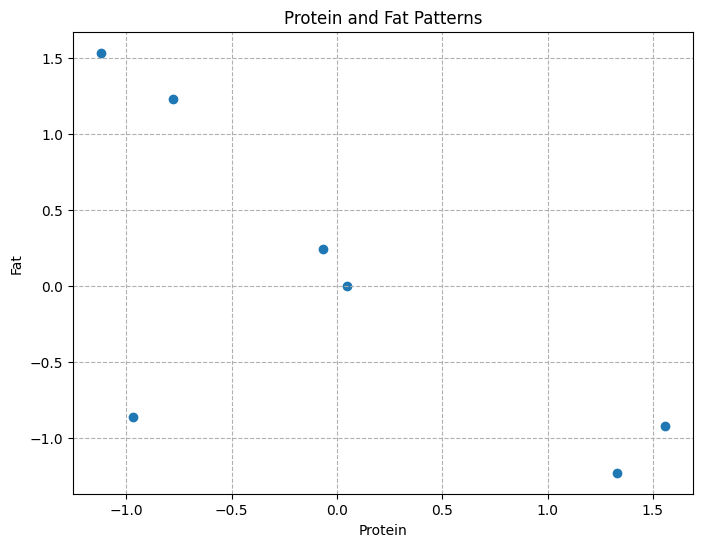

In [146]:
# Select only the feature columns (exclude the target column)
df_k_means = df.iloc[:, 1:]

# Scale dataset with standard scaler
sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df_k_means), columns=['Protein', 'Fat'])
df_sc_scaled.head()

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_sc_scaled['Protein'], df_sc_scaled['Fat'])
plt.xlabel('Protein')
plt.ylabel('Fat')
plt.grid(axis='both', linestyle='--')
plt.title("Protein and Fat Patterns")
plt.show()

## **K-Means Clustering**

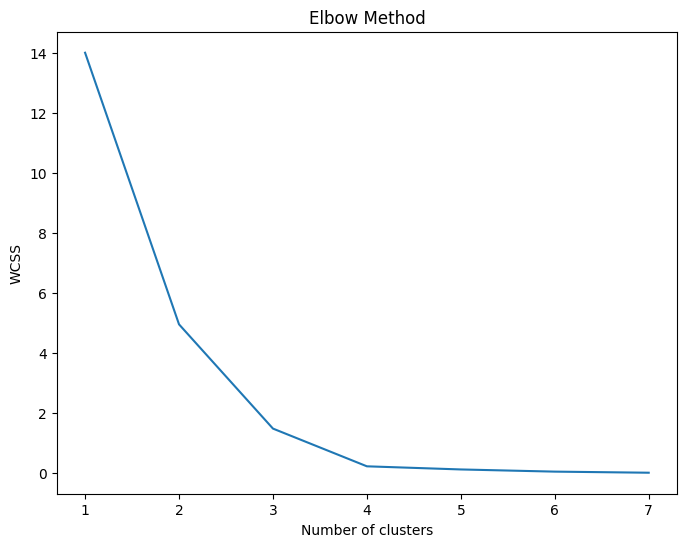

In [147]:
wcss = []
for i in range(1, 8): # Clusters 1-7
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [148]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 8),
    "WCSS": wcss
})

# Display the table
wcss_table

,Number of Clusters,WCSS
0,1,14.000000
1,2,4.945770
2,3,1.471002
3,4,0.213559
4,5,0.109032
5,6,0.036468
6,7,0.000000


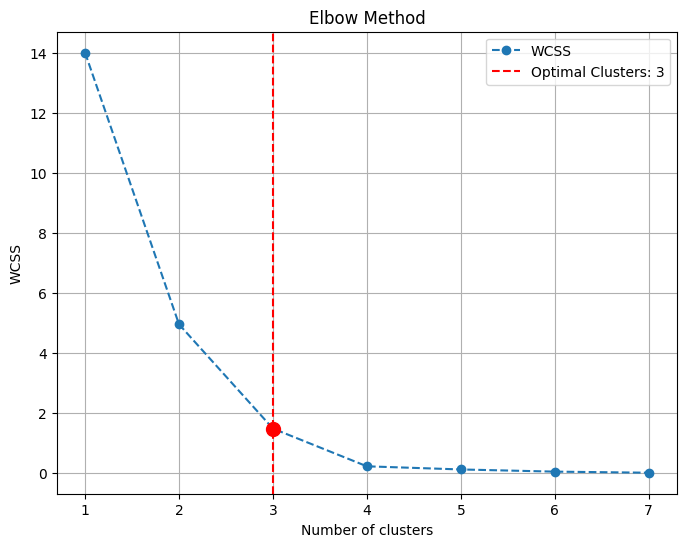

The optimal number of clusters is: 3


In [149]:
# Example WCSS values and cluster numbers
clusters = range(1, 8)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [150]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['K-Means Cluster'] = clusters

# Show the df
df.head()

,Food Item,Protein,Fat,K-Means Cluster
0,#1,1.1,60,2
1,#2,8.2,20,1
2,#3,4.2,35,0
3,#4,1.5,21,0
4,#5,7.6,15,1


## **Model Evaluation**

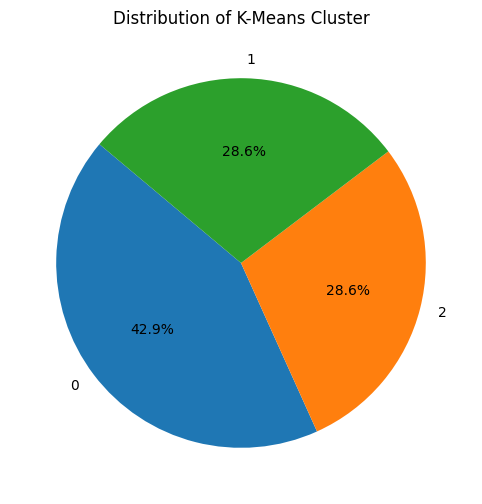

In [151]:
# Counts of each unique value in the 'Y' column
y_counts = df['K-Means Cluster'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of K-Means Cluster')
plt.show()

In [152]:
# Count how many samples in each cluster
df['K-Means Cluster'].value_counts()

,count
K-Means Cluster,
0,3
2,2
1,2


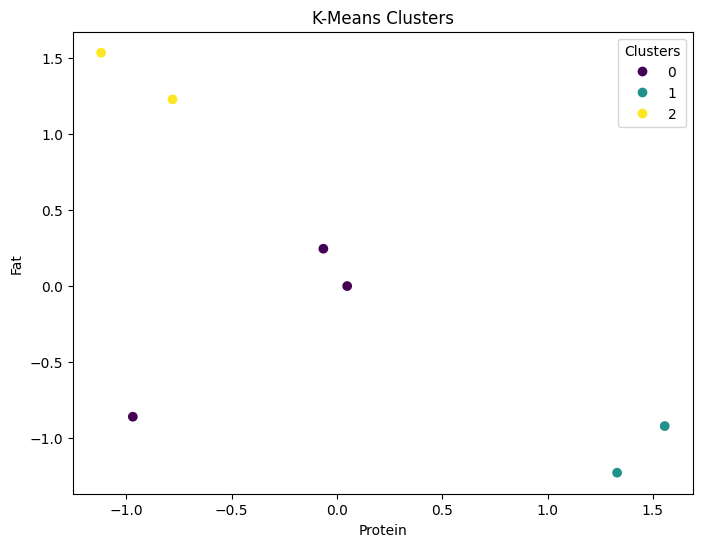

In [153]:
# K-Means clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_sc_scaled['Protein'], df_sc_scaled['Fat'], c=df['K-Means Cluster'], cmap='viridis')
plt.xlabel('Protein')
plt.ylabel('Fat')
plt.title('K-Means Clusters')
legend = plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

# **Large Dataset - Iris Dataset**

## **Load Dataset**

In [154]:
# Load dataset
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Preview the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [155]:
# Add data target to the df
df['Y'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [156]:
# Display target names
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The unique values in the `Y` column:
- 0: Iris-setosa
- 1: Iris-versicolor
- 2: Iris-virginica

In [157]:
# Check shape of the dataset
df.shape

(150, 5)

In [158]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Y                  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


There are four features — `sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, and `petal width (cm)` — and one target, `Y`, which represents the different species of Iris flowers, with a total of 150 entries.

In [159]:
# View the statistical summary of numerical variables
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


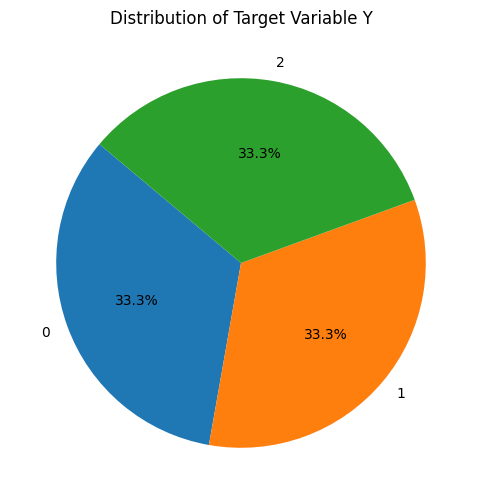

In [160]:
# Counts of each unique value in the 'Y' column
y_counts = df['Y'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable Y')
plt.show()

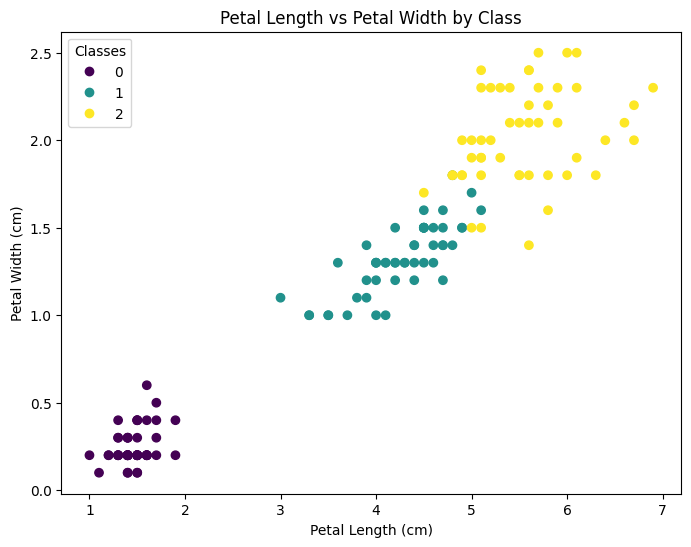

In [161]:
# Relationship between petal length and petal width
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Y'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Class')
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

## **Data Cleaning**

In [162]:
# Rename columns in dataset
df = df.rename(columns={
    'sepal length (cm)': 'Sepal Length (cm)',
    'sepal width (cm)': 'Sepal Width (cm)',
    'petal length (cm)': 'Petal Length (cm)',
    'petal width (cm)': 'Petal Width (cm)'
    })

In [163]:
# Check for missing values in dataset
df.isnull().sum()

,0
Sepal Length (cm),0
Sepal Width (cm),0
Petal Length (cm),0
Petal Width (cm),0
Y,0


In [164]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Y
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [165]:
# Keep only the first occurrence of each duplicate row and remove the rest
df = df.drop_duplicates(keep='first')

In [166]:
# Drop unused columns: 'sepal length (cm)' and 'sepal width (cm)'
df.drop(['Sepal Length (cm)', 'Sepal Width (cm)'], axis=1, inplace=True)

We only want to have 2 features: `Petal Length (cm)` and `Petal Width (cm)` and 1 target: `Y`

In [167]:
# View the summary of dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Petal Length (cm)  149 non-null    float64
 1   Petal Width (cm)   149 non-null    float64
 2   Y                  149 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.7 KB


Now, we can see that there are 3 columns with a total of 149 rows because we removed 1 duplicate row.

## **Data Scaling**

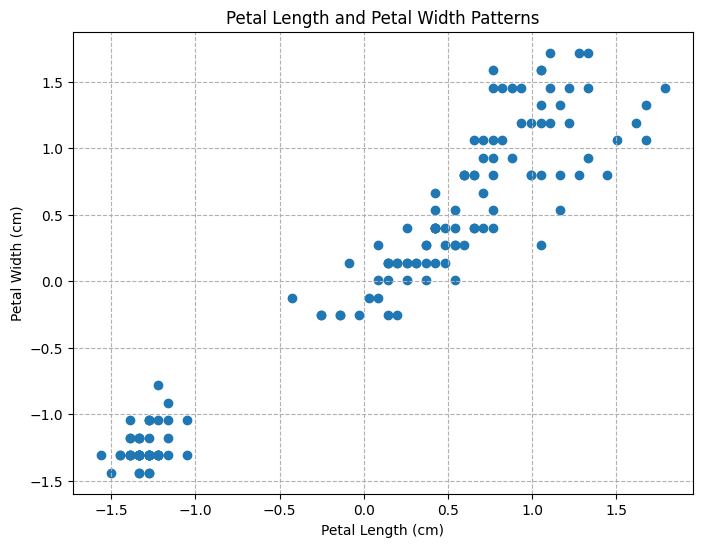

In [168]:
# Select only the feature columns (exclude the target column)
df_k_means = df.iloc[:, :-1]

# Scale dataset with standard scaler
sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df_k_means), columns=['Petal Length (cm)', 'Petal Width (cm)'])
df_sc_scaled.head()

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_sc_scaled['Petal Length (cm)'], df_sc_scaled['Petal Width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(axis='both', linestyle='--')
plt.title("Petal Length and Petal Width Patterns")
plt.show()

## **K-Means Clustering**

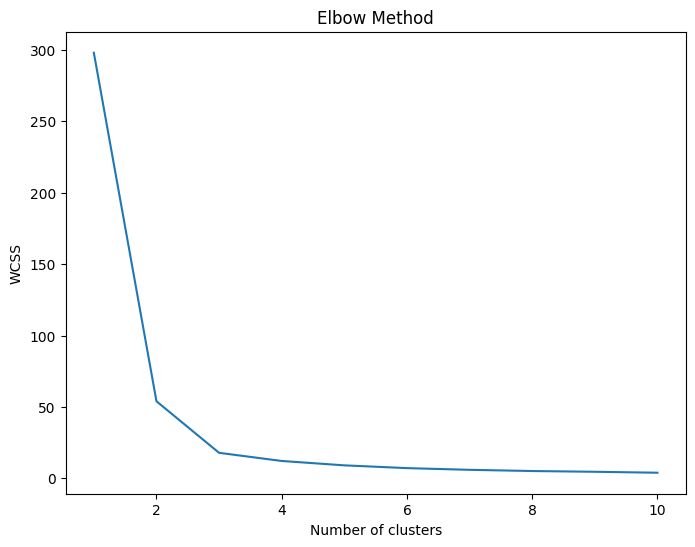

In [169]:
wcss = []
for i in range(1, 11): # Clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [170]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
wcss_table

,Number of Clusters,WCSS
0,1,298.000000
1,2,53.976317
2,3,17.878032
3,4,12.177961
4,5,9.108899
5,6,7.165371
6,7,5.980496
7,8,5.134446
8,9,4.610197
9,10,3.946669


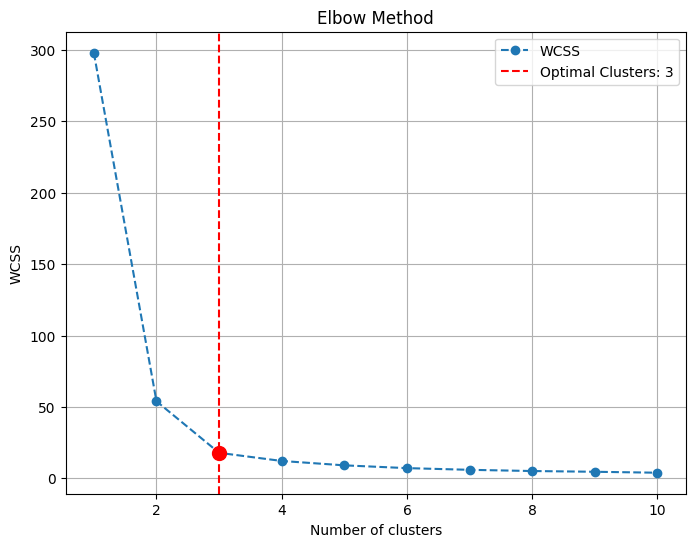

The optimal number of clusters is: 3


In [171]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [172]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['K-Means Cluster'] = clusters

# Show the df
df.head()

,Petal Length (cm),Petal Width (cm),Y,K-Means Cluster
0,1.4,0.2,0,2
1,1.4,0.2,0,2
2,1.3,0.2,0,2
3,1.5,0.2,0,2
4,1.4,0.2,0,2


## **Model Evaluation**

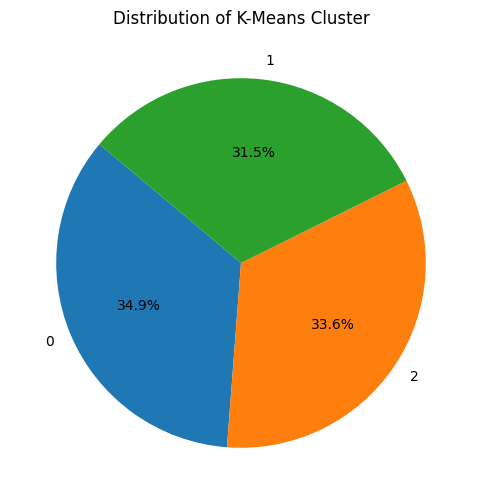

In [173]:
# Counts of each unique value in the 'Y' column
y_counts = df['K-Means Cluster'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of K-Means Cluster')
plt.show()

In [174]:
cm = confusion_matrix(df['Y'], kmeans.labels_)
df_cm = pd.DataFrame(cm,
                     index=['Iris-setosa', 'Versicolor', 'Virginica'],
                     columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])
df_cm

,Cluster 0,Cluster 1,Cluster 2
Iris-setosa,0,0,50
Versicolor,48,2,0
Virginica,4,45,0


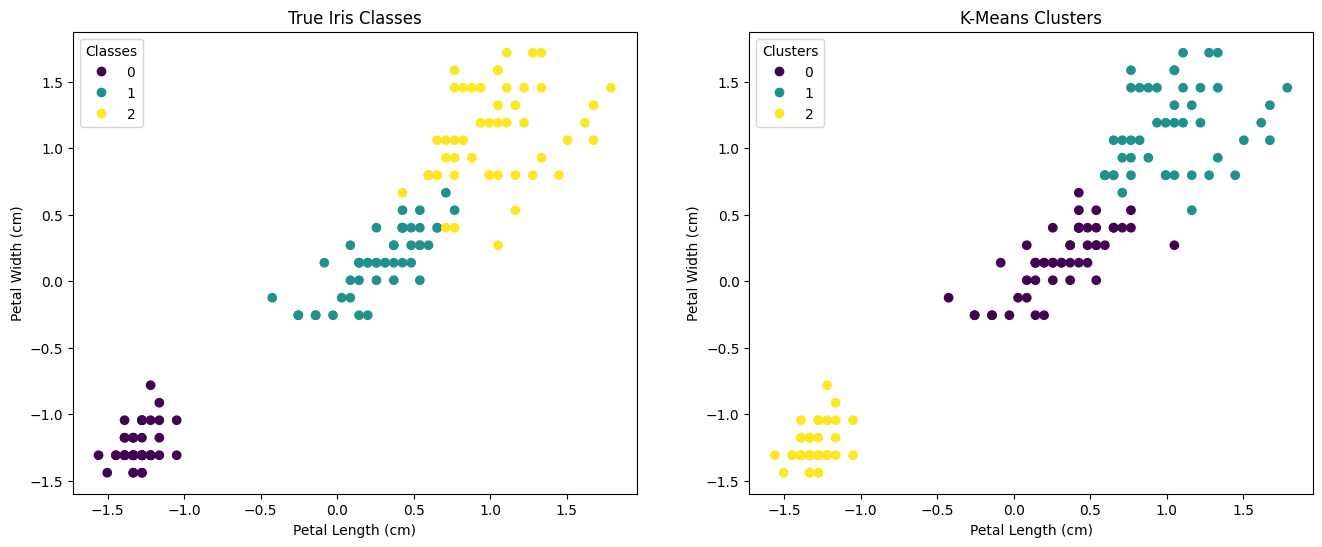

In [175]:
plt.figure(figsize=(16, 6))

# True classes
plt.subplot(1, 2, 1)
scatter = plt.scatter(df_sc_scaled['Petal Length (cm)'], df_sc_scaled['Petal Width (cm)'], c=df['Y'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('True Iris Classes')
legend = plt.legend(*scatter.legend_elements(), title="Classes")

# K-Means clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(df_sc_scaled['Petal Length (cm)'], df_sc_scaled['Petal Width (cm)'], c=df['K-Means Cluster'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clusters')
legend = plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()